In [1]:
import os

os.environ["TF_KERAS"] = "1"

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import GroupKFold

print(tf.__version__)


2.15.0


In [2]:
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [3]:
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

#dataset = pandas.read_csv(folder_path + '11-03-minmax_normalised_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'usual_wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep'])

#dataset = pandas.read_csv(folder_path + 'normalised-timed-activity-data.csv', usecols=['participantId', 'ssq_score', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance'])

#dataset = pandas.read_csv(folder_path + 'normalised-activity-survey-timed-data.csv', usecols=['participantId', 'ssq_score', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])

dataset = pd.read_csv(folder_path + 'normalised_activity_and_survey_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'max_hr', 'min_hr', 'totalSteps', 'totalDistance', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])

#dataset = pandas.read_csv(folder_path + 'normalised-timed-activity-data.csv', usecols=['participantId', 'ssq_score', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])
# split into input (X) and output (Y) variables
'''X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance']].values
#X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep']].values
X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values
'''
X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'max_hr', 'min_hr', 'totalSteps', 'totalDistance', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values
y = dataset['ssq_score'].values


In [4]:
gkf = GroupKFold(n_splits=5)

groups = dataset['participantId'].values

In [5]:
'''l1size = 10
l2size = 5'''

'''l1size = 30
l2size = 15
l3size = 5
'''
l1size = 30
l2size = 30
l3size = 15
l4size = 5


In [6]:
print(len(X), len(y))


664 664


In [7]:
train_rmse_histories = []
test_rmse_histories = []

train_mse_histories = []
test_mse_histories = []

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

unique_participants = np.unique(groups)
train_val_groups, test_groups = train_test_split(unique_participants, test_size=0.2, random_state=42) # 0.2 test
train_groups, val_groups = train_test_split(train_val_groups, test_size=0.25, random_state=42) # 0.2 val


def filter_data(groups, group_labels, X, y):
    mask = np.isin(groups, group_labels)
    return X[mask], y[mask]

X_train, y_train = filter_data(groups, train_groups, X, y)
X_val, y_val = filter_data(groups, val_groups, X, y)
X_test, y_test = filter_data(groups, test_groups, X, y)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
import keras

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(l1size, activation='relu'))
model.add(Dense(l2size, activation='relu'))
model.add(Dense(l3size, activation='relu'))
model.add(Dense(l4size, activation='relu'))
model.add(Dense(1, activation='linear'))

optm = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optm, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=400, batch_size=1, validation_data=(X_val, y_val))

predict_train = model.predict(X_train)
predict_val = model.predict(X_val)

train_rmse_history = history.history['root_mean_squared_error']
val_rmse_history = history.history['val_root_mean_squared_error']
train_mse_history = history.history['loss']
val_mse_history = history.history['val_loss']

final_test_metrics = model.evaluate(X_test, y_test, verbose=1)
final_test_mse = final_test_metrics[0]
final_test_rmse = final_test_metrics[1]

print("Final Test MSE:", final_test_mse)
print("Final Test RMSE:", final_test_rmse)



Epoch 1/400

556/556 [==============================] - 4s 5ms/step - loss: 0.0604 - root_mean_squared_error: 0.2457 - val_loss: 0.0727 - val_root_mean_squared_error: 0.2697
Epoch 2/400
556/556 [==============================] - 1s 2ms/step - loss: 0.0489 - root_mean_squared_error: 0.2211 - val_loss: 0.0708 - val_root_mean_squared_error: 0.2662
Epoch 3/400
556/556 [==============================] - 1s 2ms/step - loss: 0.0492 - root_mean_squared_error: 0.2219 - val_loss: 0.0725 - val_root_mean_squared_error: 0.2692
Epoch 4/400
556/556 [==============================] - 1s 2ms/step - loss: 0.0462 - root_mean_squared_error: 0.2150 - val_loss: 0.0694 - val_root_mean_squared_error: 0.2635
Epoch 5/400
556/556 [==============================] - 1s 2ms/step - loss: 0.0470 - root_mean_squared_error: 0.2168 - val_loss: 0.0714 - val_root_mean_squared_error: 0.2671
Epoch 6/400
556/556 [==============================] - 1s 2ms/step - loss: 0.0469 - root_mean_squared_error: 0.2167 - val_loss: 0.081

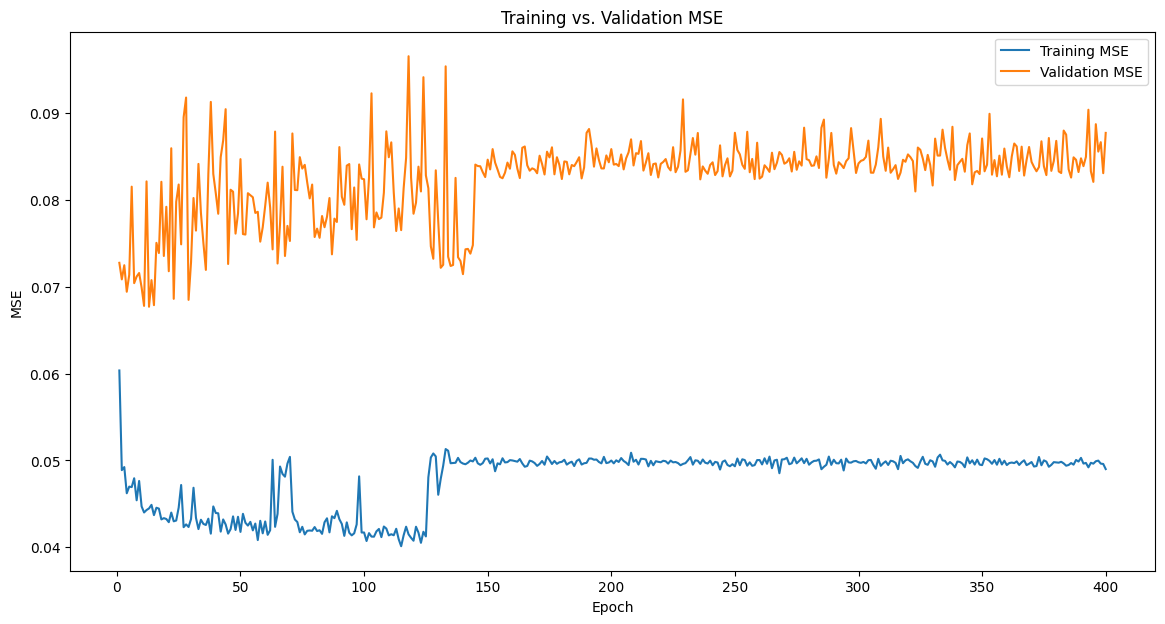

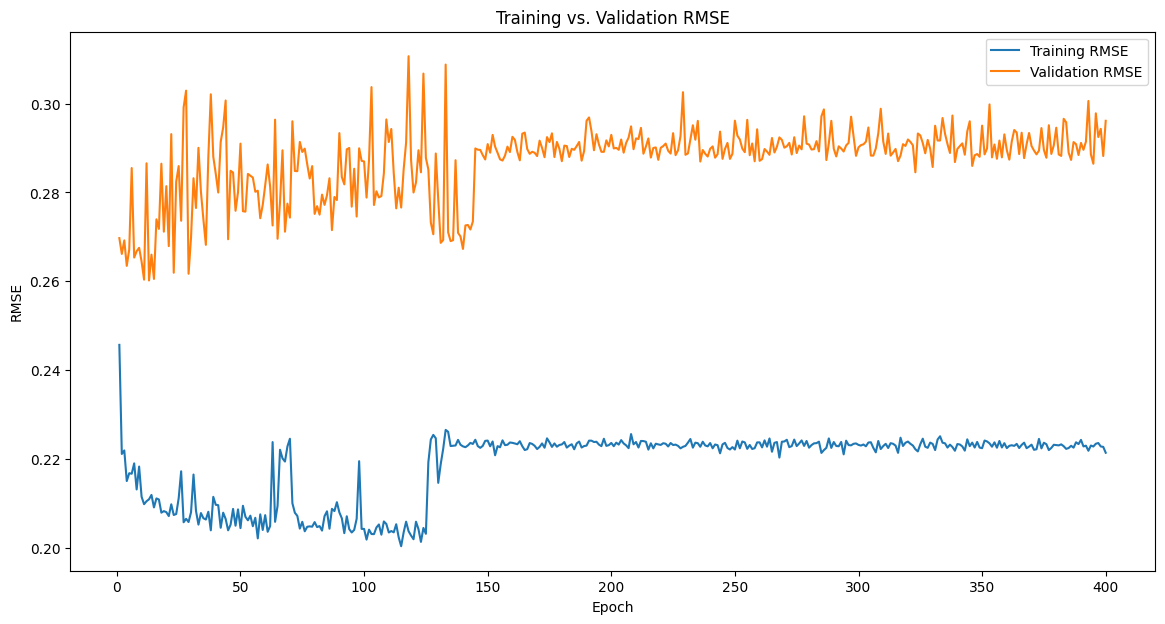

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_mse_history) + 1)

# Plotting the MSEs
plt.figure(figsize=(14, 7))
plt.plot(epochs, train_mse_history, label='Training MSE')
plt.plot(epochs, val_mse_history, label='Validation MSE')
plt.title('Training vs. Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting the RMSEs
plt.figure(figsize=(14, 7))
plt.plot(epochs, train_rmse_history, label='Training RMSE')
plt.plot(epochs, val_rmse_history, label='Validation RMSE')
plt.title('Training vs. Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [11]:
model_path = 'C:\\Users\\aoife\Documents\\Project\\model\\'

tf.saved_model.save(model, model_path)


INFO:tensorflow:Assets written to: C:\Users\aoife\Documents\Project\model\assets


INFO:tensorflow:Assets written to: C:\Users\aoife\Documents\Project\model\assets
